# Imports

In [43]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import random

# Loading Images

In [44]:
# Images folder path
imgs_path = 'imgs/'

In [45]:
def load_stereo_imgs(left_img_path, right_img_path):
    imgL = cv.imread(left_img_path, 0)
    imgR = cv.imread(right_img_path, 0)

    return imgL, imgR

In [46]:
img1L, img1R = load_stereo_imgs(imgs_path + 'l1.png', imgs_path + 'r1.png')
img2L, img2R = load_stereo_imgs(imgs_path + 'l2.png', imgs_path + 'r2.png')
img3L, img3R = load_stereo_imgs(imgs_path + 'l3.png', imgs_path + 'r3.png')

# Sample Run

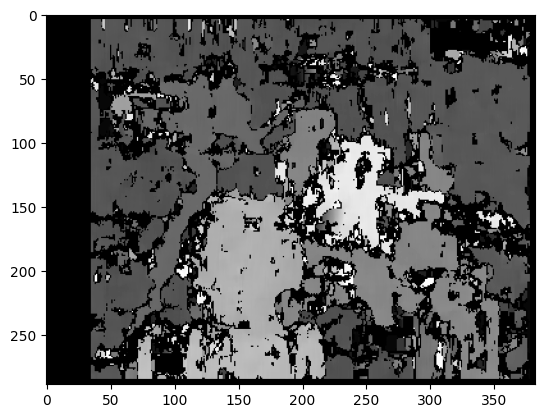

In [47]:
stereo = cv.StereoBM_create(numDisparities = 32, blockSize = 9)
disparity = stereo.compute(img1L, img1R)
plt.imshow(disparity, 'gray')
plt.show()

# 1.1.1 Block Matching

# 1.1.2 Dynamic programming

In [48]:
def dynamic_prog_disparity(left_img, right_img, sigma, c0):
    disparityl = np.zeros(left_img.shape)
    disparityr = np.zeros(right_img.shape)
    D_matrices = [] # It will be used in the bonus part
    sigma_square = sigma ** 2
    # Loop on the image rows
    for r in range(left_img.shape[0]):
        D = np.zeros((len(left_img[r]), len(left_img[r])), dtype=np.float32)
        for x in range(0, D.shape[0]):
            D[x, 0] = x * c0
            D[0, x] = x * c0
        D[0, 0] = (int(left_img[r, 0]) - int(right_img[r, 0])) ** 2 / sigma_square

        # computing table step
        for i in range(1, D.shape[0]):
            for j in range(1, D.shape[1]):
                dij = (int(left_img[r, i]) - int(right_img[r, j])) ** 2 / sigma_square
                D[i, j] = min(D[i - 1, j - 1] + dij , min(D[i - 1, j] + c0, D[i, j - 1] + c0))

        # backtracking step
        i = D.shape[0] - 1
        j = D.shape[1] - 1
        while (i > 0 and j > 0):
            '''
            You can construct the disparity matrix and prepare the D matrix to be ploted in the bonus part by these steps:
            1 - choose the minimum value of D from (i - 1, j - 1), (i - 1, j), (i, j - 1)
            2- Selecting (i - 1, j) corresponds to skipping a pixel in Il, so the left disparity map of i is zero 
            (set the pixel (i - 1, j) with the value -1 to be recognized in the bonus part)
            3- Selecting (i, j - 1) corresponds to skipping a pixel in Ir, and the right disparity map of j is zero
            (set the pixel (i, j - 1) with the value -1 to be recognized in the bonus part)
            4- Selecting (i - 1, j - 1) matches pixels (i, j) and therefore both disparity maps at this position are set to the
            absolute difference between i and j
            (set the pixels (i, j) with the value -1 to be recognized in the bonus part)
            '''
            if D[i - 1, j] < D[i - 1, j - 1] and D[i - 1, j] < D[i, j - 1]:
                disparityl[r, i - 1] = 0
                D[i - 1, j] = -1
                i -= 1
            elif D[i, j - 1] < D[i - 1, j - 1] and D[i, j - 1] < D[i - 1, j]:
                disparityr[r, j - 1] = 0
                D[i, j - 1] = -1
                j -= 1
            else:
                disparityl[r, i - 1] = np.absolute(i - j)
                disparityr[r, j - 1] = np.absolute(i - j)
                D[i - 1, j - 1] = -1
                i -= 1
                j -= 1
        
        D[0, 0] = -1
        D_matrices.append(D)
    
    return disparityl, disparityr, D_matrices

In [49]:
# Constants
sigma = 2
c0 = 1

In [50]:
# Apply Occlusion With c0 = 1
img1_disparityl, img1_disparityr, img1_D_matrices = dynamic_prog_disparity(img1L, img1R, sigma, c0)

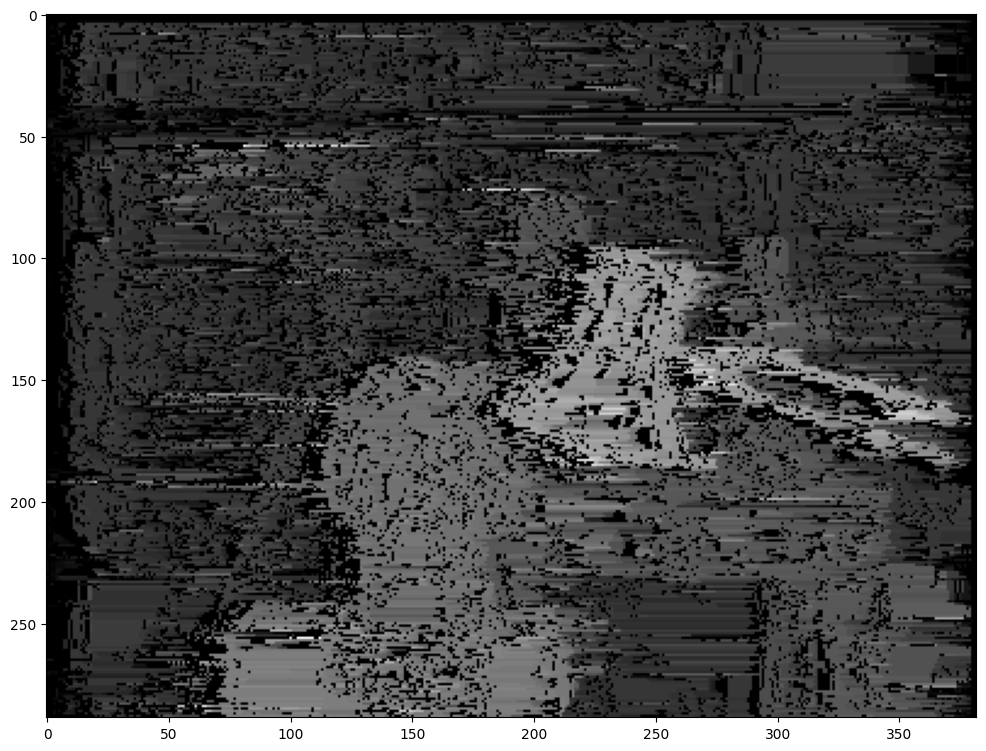

In [51]:
plt.figure(figsize=(12, 12))
plt.imshow(img1_disparityl, 'gray')

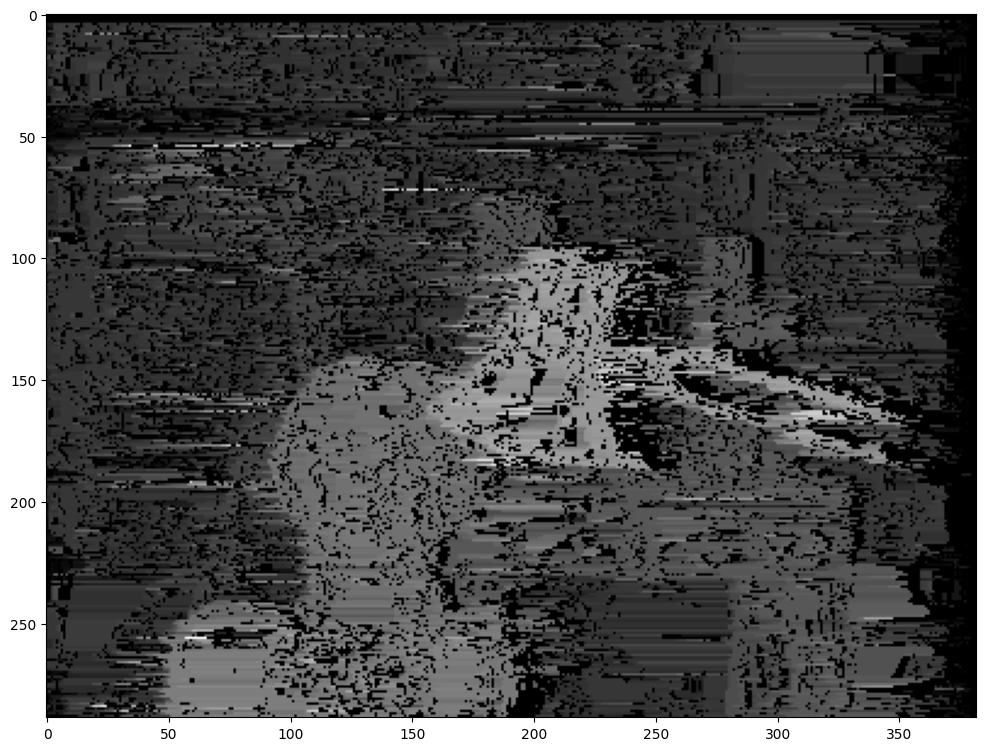

In [52]:
plt.figure(figsize=(12, 12))
plt.imshow(img1_disparityr, 'gray')

In [53]:
# Apply Occlusion With c0 = 5
img1_disparityl, img1_disparityr, img1_D_matrices = dynamic_prog_disparity(img1L, img1R, sigma, 5)

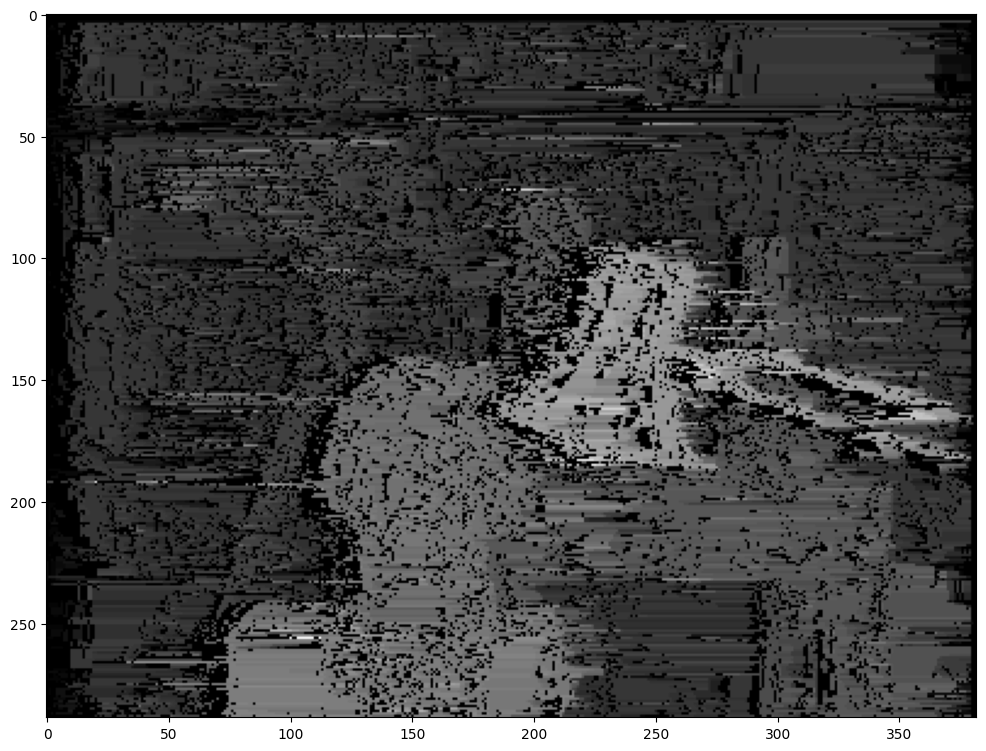

In [54]:
plt.figure(figsize=(12, 12))
plt.imshow(img1_disparityl, 'gray')

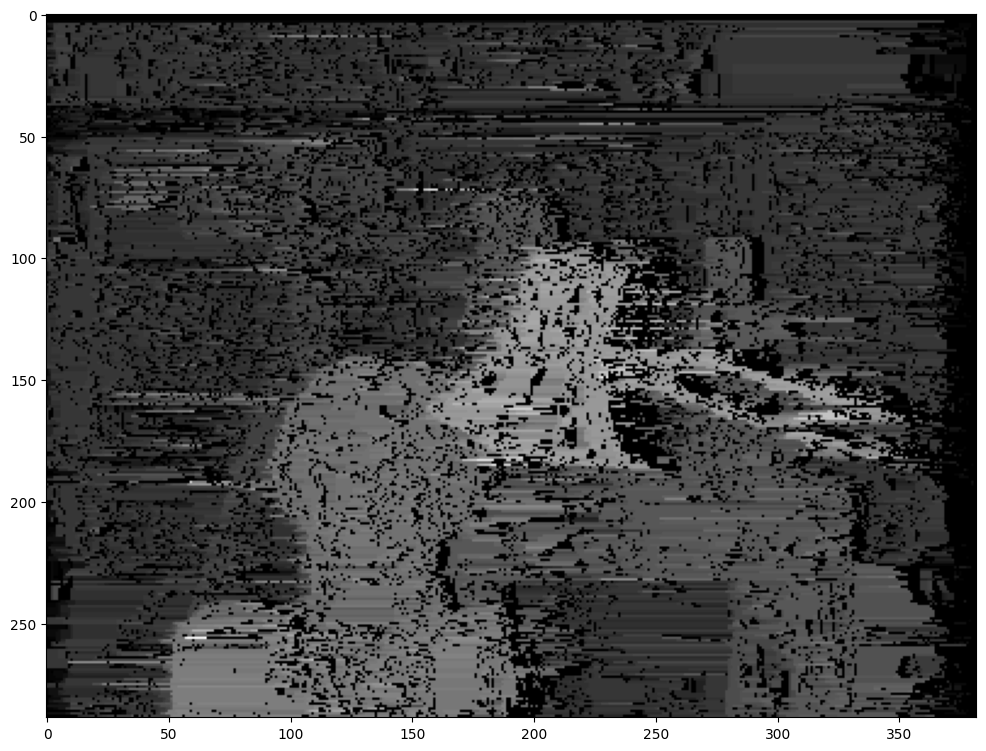

In [55]:
plt.figure(figsize=(12, 12))
plt.imshow(img1_disparityr, 'gray')

In [56]:
# Apply Occlusion With c0 = 20
img1_disparityl, img1_disparityr, img1_D_matrices = dynamic_prog_disparity(img1L, img1R, sigma, 20)

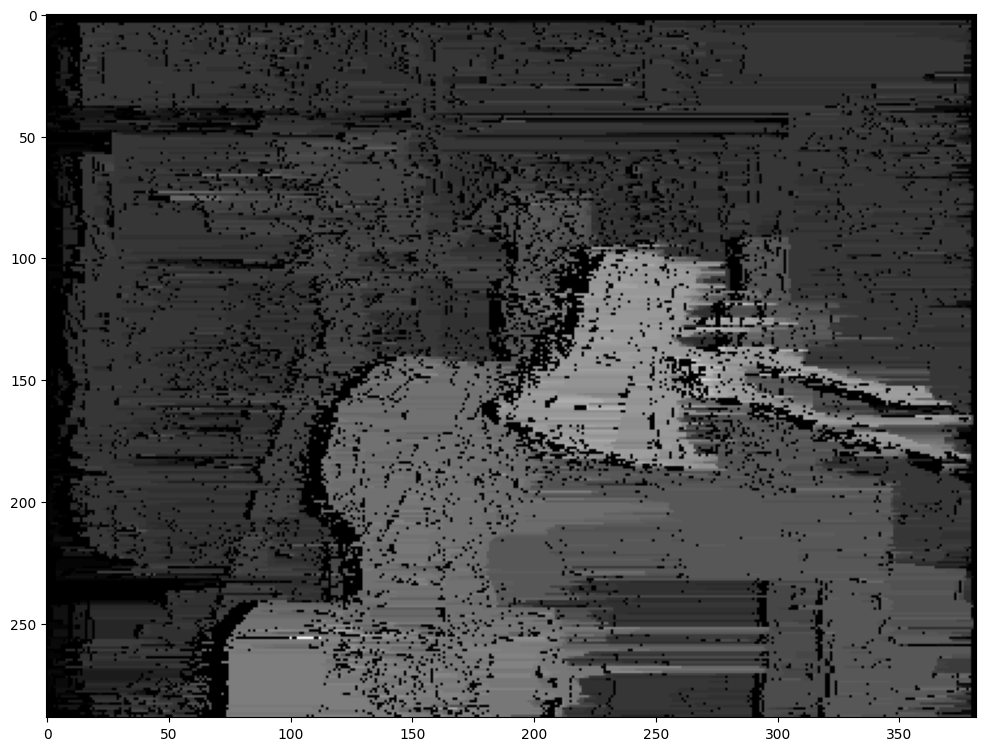

In [57]:
plt.figure(figsize=(12, 12))
plt.imshow(img1_disparityl, 'gray')

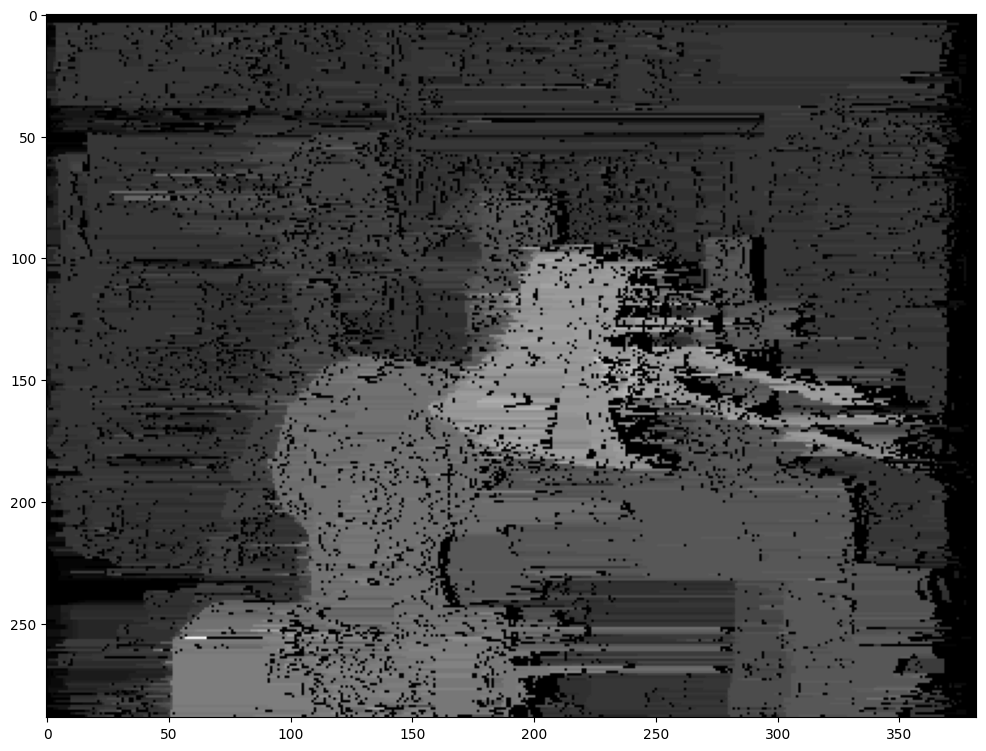

In [58]:
plt.figure(figsize=(12, 12))
plt.imshow(img1_disparityr, 'gray')

In [59]:
img2_disparityl, img2_disparityr, img2_D_matrices = dynamic_prog_disparity(img2L, img2R, sigma, c0)

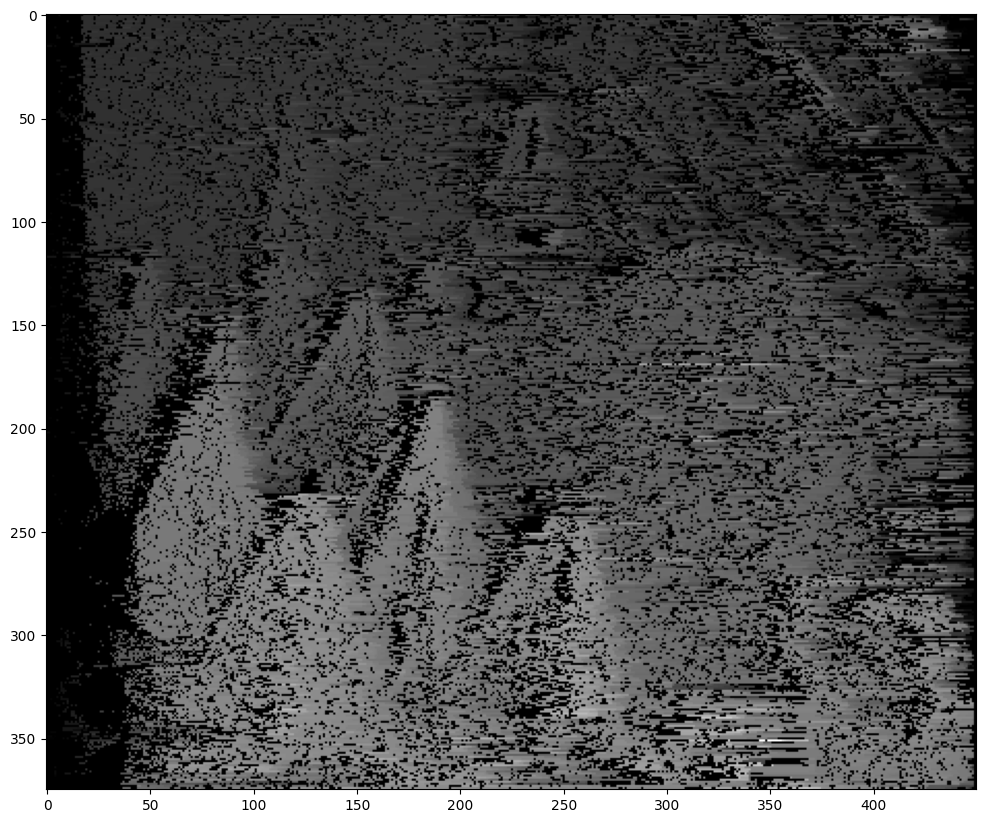

In [60]:
plt.figure(figsize=(12, 12))
plt.imshow(img2_disparityl, 'gray')

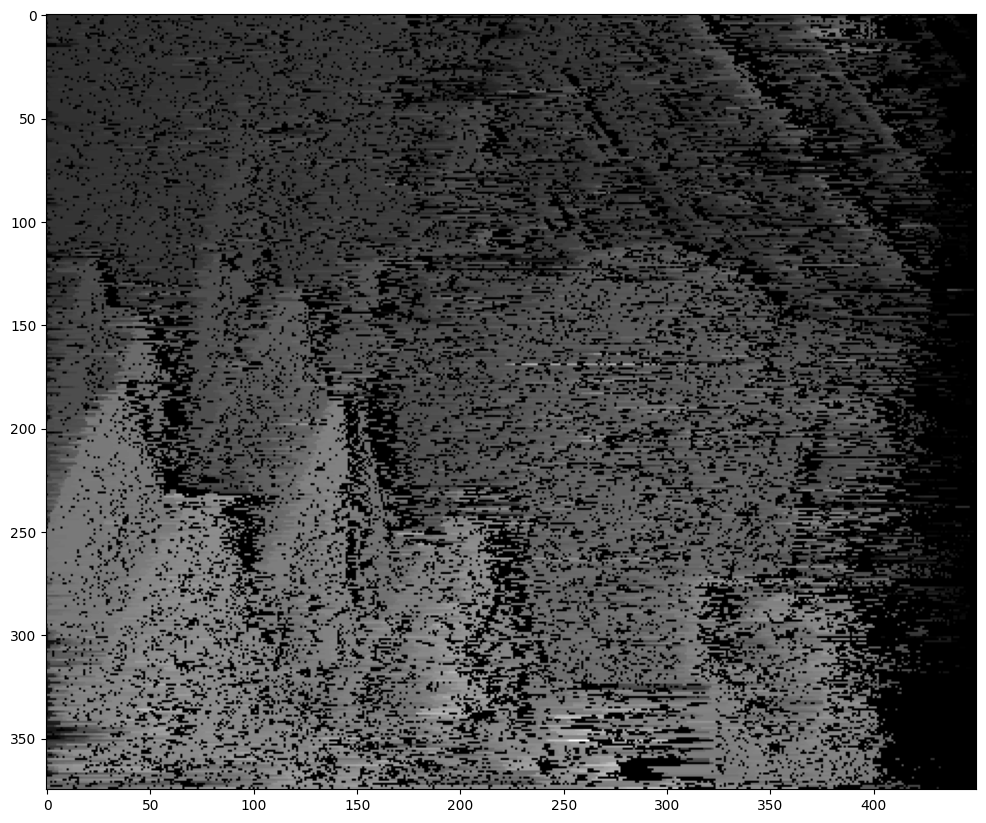

In [61]:
plt.figure(figsize=(12, 12))
plt.imshow(img2_disparityr, 'gray')

In [62]:
img3_disparityl, img3_disparityr, img3_D_matrices = dynamic_prog_disparity(img3L, img3R, sigma, c0)

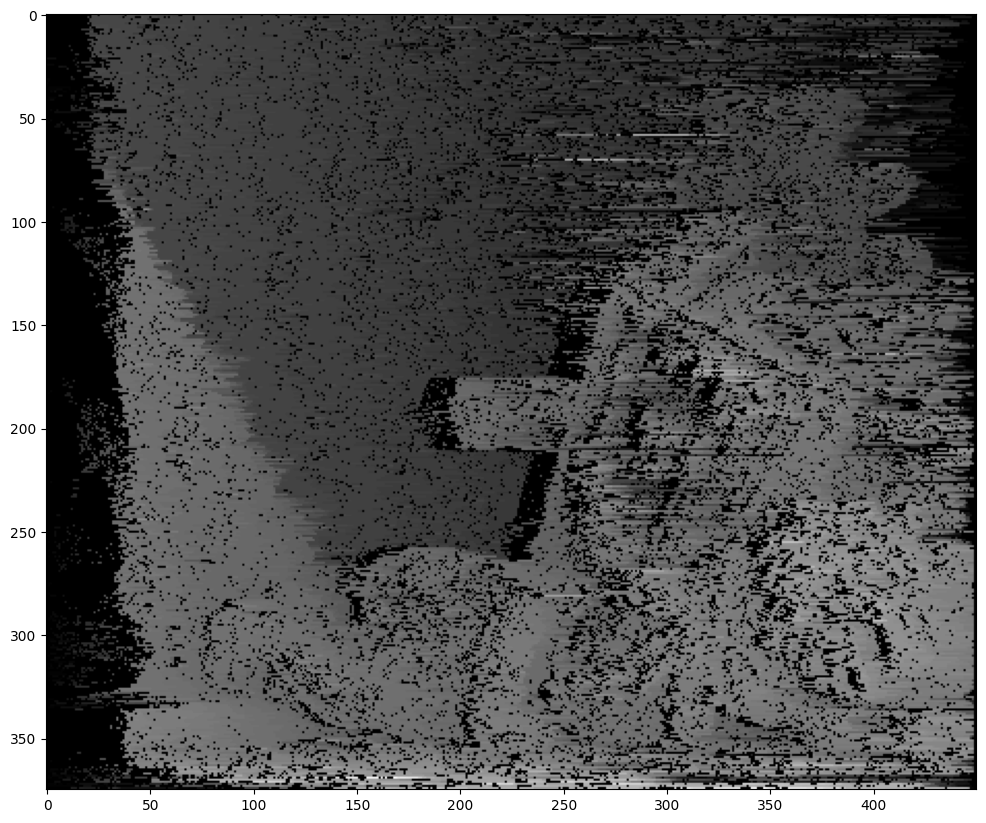

In [63]:
plt.figure(figsize=(12, 12))
plt.imshow(img3_disparityl, 'gray')

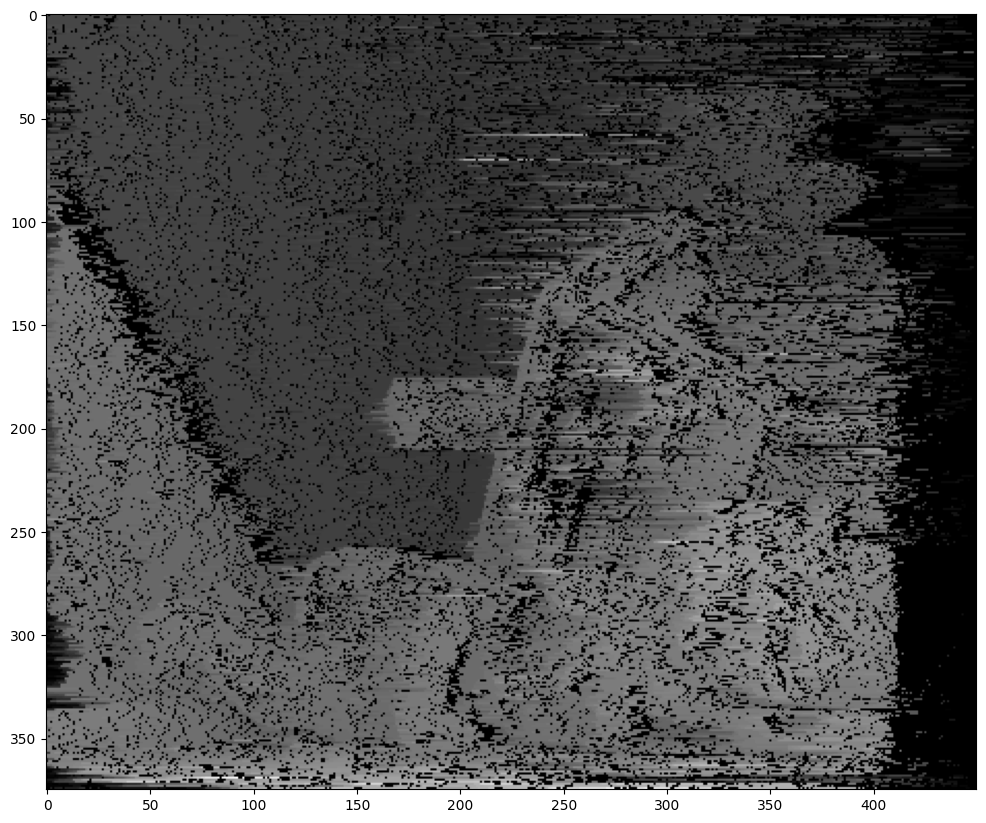

In [64]:
plt.figure(figsize=(12, 12))
plt.imshow(img3_disparityr, 'gray')

# 1.2 Bonus

In [65]:
# Plot one of the D_matrices for every test image (D_matrices should be pre-prepared)
# For every line pixel(i, j) the value of the pixle in D(i, j) will equal -1
# For every non-line pixel(i, j) the value of the pixel in D(i, j) will not equal -1

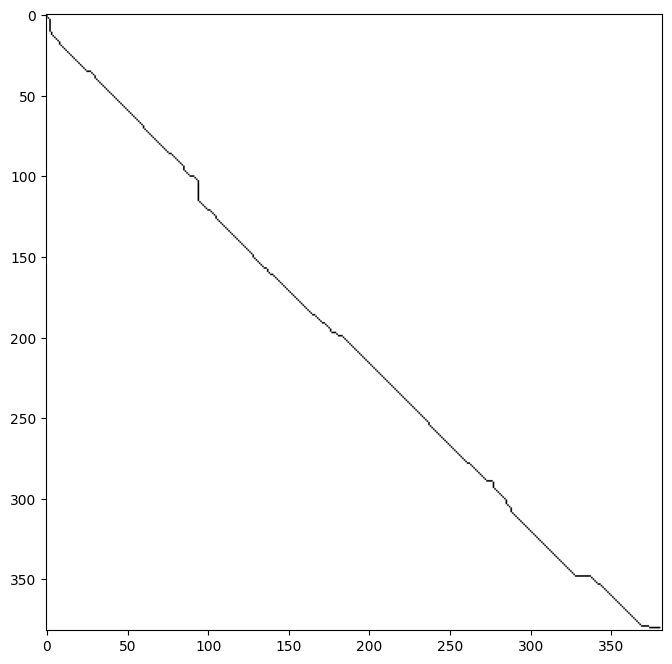

In [66]:
_, thresh1 = cv.threshold(img1_D_matrices[random.randint(0,len(img1_D_matrices) - 1)], 0, 255, cv.THRESH_BINARY)
plt.figure(figsize=(8, 8))
plt.imshow(thresh1, 'gray')

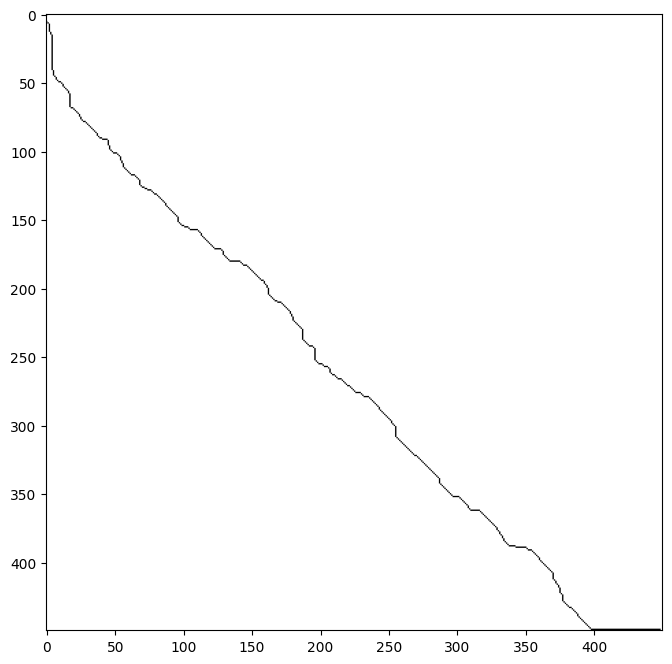

In [73]:
_, thresh2 = cv.threshold(img2_D_matrices[random.randint(0,len(img2_D_matrices) - 1)], 0, 255, cv.THRESH_BINARY)
plt.figure(figsize=(8, 8))
plt.imshow(thresh2, 'gray')

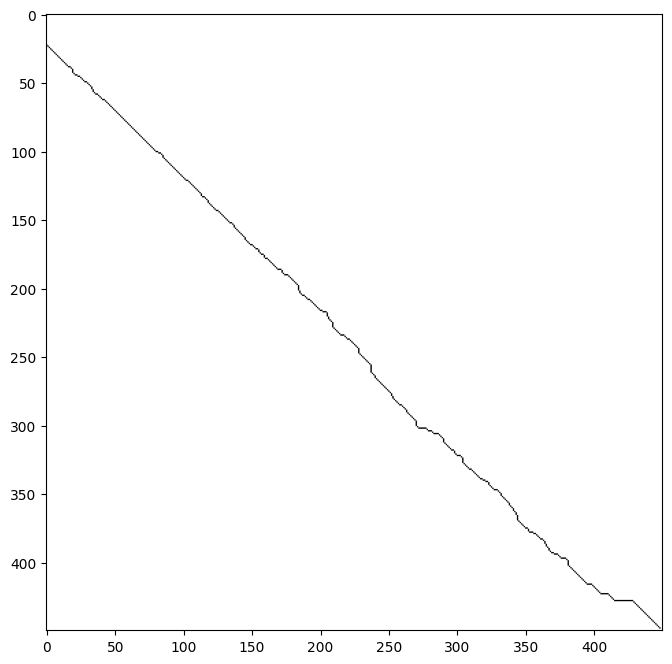

In [72]:
_, thresh3 = cv.threshold(img3_D_matrices[random.randint(0,len(img3_D_matrices) - 1)], 0, 255, cv.THRESH_BINARY)
plt.figure(figsize=(8, 8))
plt.imshow(thresh3, 'gray')